In [565]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Important Liraries**


In [566]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install fancyimpute
import fancyimpute
from pandas.core.common import SettingWithCopyWarning
from pandas_profiling import ProfileReport
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
!pip install scikit-plot
import scikitplot as skplt
from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
%matplotlib inline
!pip install pandas-profiling
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Reading Both CSV Files**

In [567]:
df1= pd.read_csv('/content/drive/MyDrive/Capstone Project/Dataset/Credit_card.csv')
df2=pd.read_csv("/content/drive/MyDrive/Capstone Project/Dataset/Credit_card_label.csv")

**Merging Both CSV Files on the common column Ind_ID**

In [568]:
df= pd.merge(df1,df2,on="Ind_ID")

**How big is the data?**

In [569]:
df.shape

(1548, 19)

**How does the data look like?**

In [570]:
df.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
840,5023838,F,Y,N,0,315000.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-19801.00,-1077,1,0,1,0,Core staff,2,0
1188,5044940,M,N,Y,2,360000.00,State servant,Higher education,Married,House / apartment,-16027.00,-5639,1,0,1,0,Managers,4,0
373,5116818,M,N,Y,0,85500.00,State servant,Secondary / secondary special,Separated,Co-op apartment,-16542.00,-8737,1,1,1,0,Core staff,1,0
1164,5117551,M,Y,N,1,148500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,-12930.00,-2865,1,1,1,0,Drivers,3,0
1166,5028802,F,N,N,2,112500.00,Working,Secondary / secondary special,Married,House / apartment,-15766.00,-1086,1,0,0,0,Laborers,4,0


**What is the data type of columns?**

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

According to this, we have 19 columns-

3  Continous Variables- Annual_Income, Birthday_count, Employed_days.

Remaining are
16 Categorical Variables



**Are there any missing values?**

In [572]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In this dataset, the "Type_Occupation" column has 488 null values. This is approximately 31% of the total data points that we have.There are other columns such as Gender, Annula_Income and Birthday_count which have missing values. We are going to use some imputation techniques in this column as well as other columns to deal with these null values. 

In [573]:
df.describe(include = 'all') # summarizing all variables

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1548.00,1541,1548,1548,1548.00,1525.00,1548,1548,1548,1548,1526.00,1548.00,1548.00,1548.00,1548.00,1548.00,1060,1548.00,1548.00
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5078920.35,NaN,NaN,NaN,0.41,191399.33,NaN,NaN,NaN,NaN,-16040.34,59364.69,1.00,0.21,0.31,0.09,NaN,2.16,0.11
std,41717.59,NaN,NaN,NaN,0.78,113253.00,NaN,NaN,NaN,NaN,4229.50,137808.06,0.00,0.41,0.46,0.29,NaN,0.95,0.32
min,5008827.00,NaN,NaN,NaN,0.00,33750.00,NaN,NaN,NaN,NaN,-24946.00,-14887.00,1.00,0.00,0.00,0.00,NaN,1.00,0.00
25%,5045069.75,NaN,NaN,NaN,0.00,121500.00,NaN,NaN,NaN,NaN,-19553.00,-3174.50,1.00,0.00,0.00,0.00,NaN,2.00,0.00
50%,5078841.50,NaN,NaN,NaN,0.00,166500.00,NaN,NaN,NaN,NaN,-15661.50,-1565.00,1.00,0.00,0.00,0.00,NaN,2.00,0.00
75%,5115673.00,NaN,NaN,NaN,1.00,225000.00,NaN,NaN,NaN,NaN,-12417.00,-431.75,1.00,0.00,1.00,0.00,NaN,3.00,0.00


**Are there duplicate values?**

In [574]:
df.duplicated().sum()

0

Our dataset has no duplicate values.

**How is the correlation between cols?**

In [575]:
df.corr()['label']

Ind_ID            0.02
CHILDREN         -0.02
Annual_income     0.03
Birthday_count   -0.05
Employed_days     0.03
Mobile_phone       NaN
Work_Phone       -0.01
Phone            -0.00
EMAIL_ID          0.01
Family_Members   -0.03
label             1.00
Name: label, dtype: float64

This is unclean data which has missing values as well as outliers. So, we are not sure of the correlation values are actually significant to our study right now. But, we can say that mobile_phone, work_phone, phone and EMAIL_ID are not significant in regard with the Label.


# **Data Cleaning**

In [576]:
#First making copy of the dataset
copy= df.copy()

In [577]:
#Converting Birthday_Count in days to years
copy['Birthday_count'] = abs(copy['Birthday_count'] / 365)
copy['Birthday_count'] = copy['Birthday_count'].round()

In [578]:
# Convert the "Employed_days" column from days to years and make negative values positive
copy['Employed_days'] = abs(copy['Employed_days'] / 365.25)
copy['Employed_days'] = round(copy['Employed_days'], 1)

In [579]:
copy.isnull().mean()*100

Ind_ID             0.00
GENDER             0.45
Car_Owner          0.00
Propert_Owner      0.00
CHILDREN           0.00
Annual_income      1.49
Type_Income        0.00
EDUCATION          0.00
Marital_status     0.00
Housing_type       0.00
Birthday_count     1.42
Employed_days      0.00
Mobile_phone       0.00
Work_Phone         0.00
Phone              0.00
EMAIL_ID           0.00
Type_Occupation   31.52
Family_Members     0.00
label              0.00
dtype: float64

There is no direct reason for the missing values in GENDER, Annual_income and Birthday_count features. They are missing completely at random(MCAR). But the column Type_Occupation is having >30% of values missing. This says that people are less likely to tell about their occupation. We will use different imputation techniques to deal with these null vaues and choose the best one for our data cleaning process.

<Axes: >

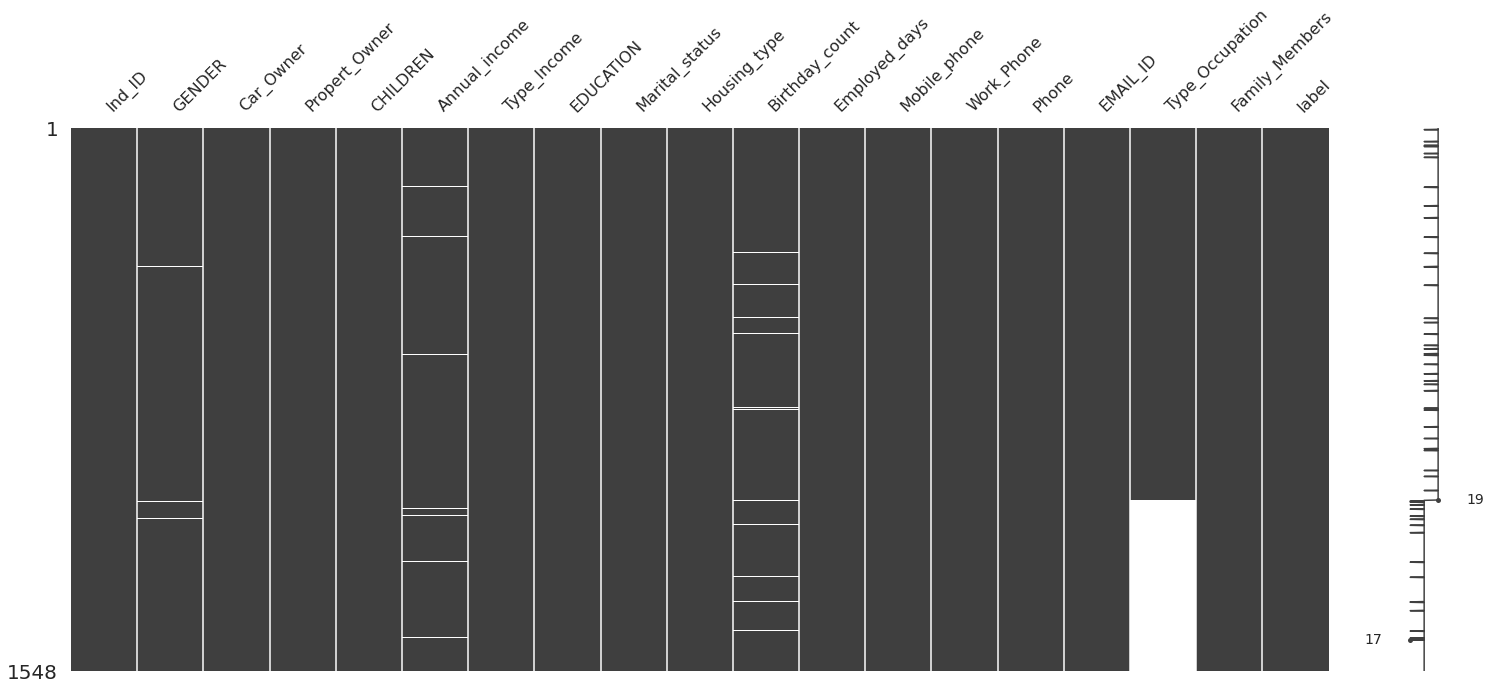

In [580]:
msno.matrix(copy.sort_values(by=['Type_Occupation']))

In [581]:
copy['Type_Occupation']= copy['Type_Occupation'].fillna('Unknown')
copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,1000.00,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,1.60,1,1,1,0,Unknown,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1


In [582]:
copy= copy.dropna()

In [583]:
copy2= copy.copy()

In [584]:
copy2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,1000.00,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
6,5009754,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
7,5009894,F,N,N,0,180000.00,Pensioner,Secondary / secondary special,Married,House / apartment,61.00,1000.00,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.00,State servant,Secondary / secondary special,Married,House / apartment,31.00,9.70,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.00,3.30,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,36.00,6.80,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,42.00,1.80,1,1,1,0,Drivers,2,0


After Dropping null values, we are down to 1496 rows. Originally, we had 1548 rows. This results in the loss of 3% of total original data but we have all clean data now. And we can perform analysis on this data and generate insights.

**Renaming Features**

In [585]:
copy2= copy2.rename(columns={
    "Ind_ID"            :"ID",
    'GENDER'            :'Gender',
    'Car_Owner'         :'Has_a_car',
    'Propert_Owner'     :'Has_a_property',
    'CHILDREN'          :'Children_count',
    'Annual_income'     :'Income',
    'Type_Income'       :'Employment_status',
    'EDUCATION'         :'Education_level',
    'Housing_type'      :'Dwelling',
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    'Mobile_phone'      :'Has_a_mobile_phone',
    'Work_Phone'        :"Has_a_work_phone",
    'Phone'             :'Has_a_phone',
    'EMAIL_ID'          :'Has_an_email',
    'Type_Occupation'   :'Job_Title',
    'Fmaily_Member'     :'Family_member_count',
    })

**Data Encoding For the Best Imputation of Experience Feature in the Data.**

We will do the Imputation of the Experience after doing the Data_Encoding

To Get the Best Imputed Value and to Run all the Imputation KNN and MICE all the data should be Encoded

In [586]:
credit_df = copy2.copy()

In [587]:
credit_df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employed_Years,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,1000.00,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
6,5009754,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1.60,1,1,1,0,Unknown,2,1
7,5009894,F,N,N,0,180000.00,Pensioner,Secondary / secondary special,Married,House / apartment,61.00,1000.00,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.00,State servant,Secondary / secondary special,Married,House / apartment,31.00,9.70,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.00,3.30,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,36.00,6.80,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,42.00,1.80,1,1,1,0,Drivers,2,0


In [588]:
credit_df.Employed_Years.replace(1000,np.NaN,inplace=True)

In [589]:
credit_df['Education_level'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [590]:
# Gender , Car , Property  ---> Numerical Data
credit_df['Gender'].replace('M',0,inplace=True)
credit_df['Gender'].replace('F',1,inplace=True)
credit_df['Has_a_car'].replace('Y',0,inplace=True)
credit_df['Has_a_car'].replace('N',1,inplace=True)
credit_df['Has_a_property'].replace('Y',0,inplace=True)
credit_df['Has_a_property'].replace('N',1,inplace=True)

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le1 = LabelEncoder()
# fit and transform the Type_Income column
credit_df['Employment_status_Encoded'] = le1.fit_transform(credit_df['Employment_status'])
# Drop the original Type_Income column
credit_df.drop('Employment_status', axis=1, inplace=True)

le2 = LabelEncoder()
credit_df['Dwelling_Encoded'] = le2.fit_transform(credit_df['Dwelling'])
credit_df.drop('Dwelling', axis=1, inplace=True)

le3 = LabelEncoder()
credit_df['Job_Title_Encoded'] = le2.fit_transform(credit_df['Job_Title'])
credit_df.drop('Job_Title', axis=1, inplace=True)



from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
credit_df['Education_level_Encoded'] = encoder.fit_transform(credit_df[['Education_level']])
# drop the original Education_level column
credit_df.drop('Education_level', axis=1, inplace=True)


credit_df['Marital_status'].replace('Civil marriage',"Married",inplace=True)
credit_df['Marital_status'].replace('Widow',"Separated",inplace=True)
credit_df['Marital_status'].replace("Single / not married","Single",inplace=True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop= "first")
# Select the column to be encoded
marital_status = credit_df[['Marital_status']]
# Fit and transform the data using the encoder
marital_encoded_df = pd.DataFrame(encoder.fit_transform(marital_status), columns=["Married","Separated"],dtype=int)
# Concatenate the encoded data with the original dataframe
credit_df = pd.concat([credit_df, marital_encoded_df], axis=1)
# Drop the original column that was encoded
credit_df.drop(['Marital_status'], axis=1, inplace=True)

Imputing row 1/1546 with 1 missing, elapsed time: 0.467
Imputing row 101/1546 with 1 missing, elapsed time: 0.469
Imputing row 201/1546 with 0 missing, elapsed time: 0.470
Imputing row 301/1546 with 0 missing, elapsed time: 0.472
Imputing row 401/1546 with 1 missing, elapsed time: 0.473
Imputing row 501/1546 with 0 missing, elapsed time: 0.474
Imputing row 601/1546 with 0 missing, elapsed time: 0.475
Imputing row 701/1546 with 0 missing, elapsed time: 0.476
Imputing row 801/1546 with 0 missing, elapsed time: 0.478
Imputing row 901/1546 with 1 missing, elapsed time: 0.479
Imputing row 1001/1546 with 0 missing, elapsed time: 0.480
Imputing row 1101/1546 with 0 missing, elapsed time: 0.482
Imputing row 1201/1546 with 0 missing, elapsed time: 0.483
Imputing row 1301/1546 with 1 missing, elapsed time: 0.484
Imputing row 1401/1546 with 1 missing, elapsed time: 0.485
Imputing row 1501/1546 with 18 missing, elapsed time: 0.489


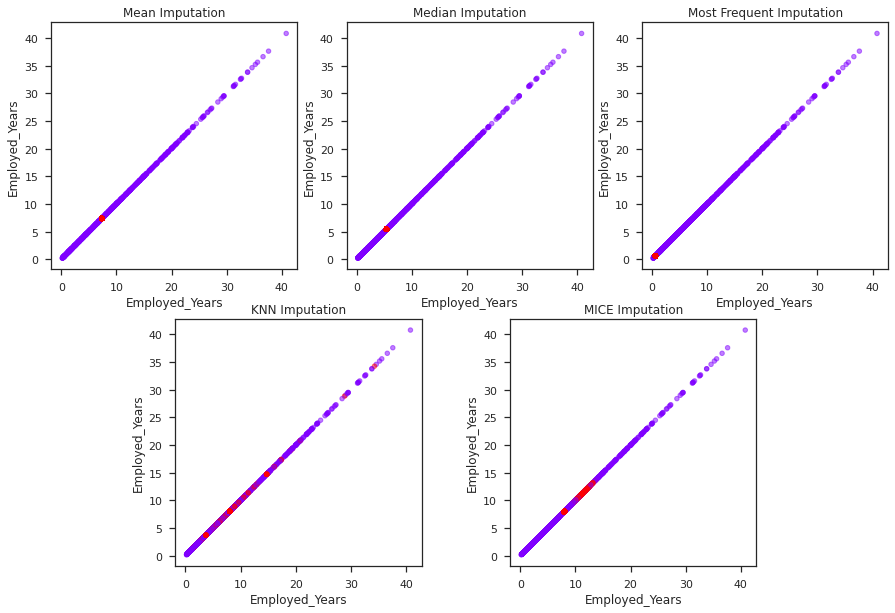

In [591]:
#Mean Imputation
from sklearn.impute import SimpleImputer
credit_mean = credit_df.copy()
mean_imputer = SimpleImputer(strategy="mean")
credit_mean.iloc[:,:] = mean_imputer.fit_transform(credit_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
credit_median = credit_df.copy()
median_imputer = SimpleImputer(strategy="median")
credit_median.iloc[:,:] = median_imputer.fit_transform(credit_median)
credit_median

#Mode Imputation
from sklearn.impute import SimpleImputer
credit_mode = credit_df.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
credit_mode.iloc[:,:] = mode_imputer.fit_transform(credit_mode)
credit_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
credit_knn = credit_df.copy()
credit_knn.iloc[:,:] = knn_imputer.fit_transform(credit_knn)
credit_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
credit_MICE = credit_df.copy(deep=True)
credit_MICE.iloc[:, :] = MICE_imputer.fit_transform(credit_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = credit_df['Employed_Years'].isnull() + credit_df['Age'].isnull()
imputations = {'Mean Imputation': credit_mean,
               'Median Imputation': credit_median,
               'Most Frequent Imputation': credit_mode,
               'KNN Imputation': credit_knn,
              'MICE Imputation': credit_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

KNN imputation works the best from all. We will use KNN imputer for this column.

In [592]:
# Taking our imputed Employed_Years Column to the Main DataFrame
credit_df = credit_knn.copy()
credit_employ = credit_df[["ID","Employed_Years"]]
data_sql = credit_employ.merge(copy2,how="inner" , on = ["ID"])
data_sql.drop("Employed_Years_y",axis=1,inplace=True)
data_sql

,ID,Employed_Years_x,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_Members,label
0,5008827.00,6.81,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,1,0,0,0,Unknown,2,1
1,5009744.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
2,5009752.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
3,5009754.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
4,5009894.00,3.21,F,N,N,0,180000.00,Pensioner,Secondary / secondary special,Married,House / apartment,61.00,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5118268.00,9.70,M,Y,N,1,360000.00,State servant,Secondary / secondary special,Married,House / apartment,31.00,1,0,1,0,Drivers,3,0
1492,5023655.00,3.30,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.00,1,0,0,0,Accountants,1,0
1493,5115992.00,6.80,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,36.00,1,0,0,0,Managers,4,0
1494,5118219.00,1.80,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,42.00,1,1,1,0,Drivers,2,0


In [593]:
data_sql.set_index('ID', inplace= True)

Here data cleaning process is done.Now the final dataframe will be exported to run general data analysis queries in SQL and derive soem insights from the data.

In [594]:
data = pd.DataFrame(data_sql)

**Saving the dataframe locally as CSV file.**

In [595]:
data.to_csv('data.csv', index=True)

**After using the raw data and cleaning it to answer some of the basic questions, We are going to perform EDA.**

# **Exploratory Data Analysis- EDA**

In [596]:
data

,Employed_Years_x,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_Members,label
ID,,,,,,,,,,,,,,,,,,
5008827.00,6.81,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,1,0,0,0,Unknown,2,1
5009744.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
5009752.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
5009754.00,1.60,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,1,1,1,0,Unknown,2,1
5009894.00,3.21,F,N,N,0,180000.00,Pensioner,Secondary / secondary special,Married,House / apartment,61.00,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118268.00,9.70,M,Y,N,1,360000.00,State servant,Secondary / secondary special,Married,House / apartment,31.00,1,0,1,0,Drivers,3,0
5023655.00,3.30,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.00,1,0,0,0,Accountants,1,0
5115992.00,6.80,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,36.00,1,0,0,0,Managers,4,0


In [597]:
#Renaming the Features names
data= data.rename(columns={
   "Employed_Years_x"     : "Experience",
   "Gender"               : "GENDER",
   "Has_a_car"            : "Car_Owner",
   "Has_a_property"       : "Property_Owner",
   "Children_count"       : "CHILDREN",
   "Income"               : "Annual_income",
   "Employment_status"    : "Type_Income",
   "Education_level"      : "EDUCATION",
   "Dwelling"             : "Housing_type",
   "Has_a_mobile_phone"   : "Mobile_phone",
   "Has_a_work_phone"     : "Work_Phone",
   "Has_a_phone"          : "Phone",
   "Has_an_email"         : "EMAIL_ID",
   "Job_Title"            : "Type_Occupation" 
   })

In [598]:
def categorical_summary(data, column_name):
    '''
    This function takes in a dataframe and a column name and returns a summary of the categorical data
    '''
    total_count = data[column_name].count()
    category_counts = data[column_name].value_counts()
    category_percentages = round((category_counts/total_count)*100, 2)
    summary_data = pd.concat([category_counts, category_percentages], axis=1)
    summary_data.columns = ['Category Count', 'Category Percentage']
    return summary_data


# **UNIVARIATE ANALYSIS**

**GENDER**

In [599]:
data['GENDER'].describe()

count     1496
unique       2
top          F
freq       947
Name: GENDER, dtype: object

In [600]:
categorical_summary(data, 'GENDER')

,Category Count,Category Percentage
F,947,63.30
M,549,36.70


<Axes: xlabel='GENDER', ylabel='count'>

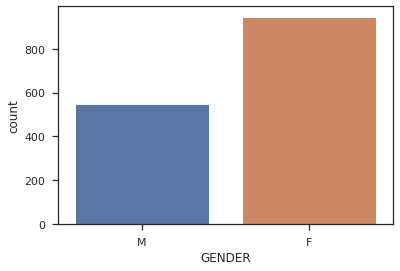

In [601]:
sns.countplot(x='GENDER', data=data)

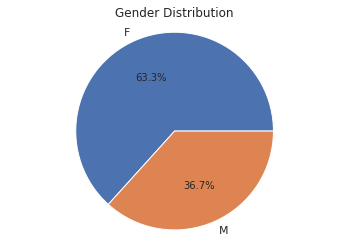

In [602]:
# Group the data by gender and count the number of occurrences
gender_counts = data.groupby('GENDER')['GENDER'].count()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Interpretation:

We have more female applicants than male (62% vs 38%)

**Age**

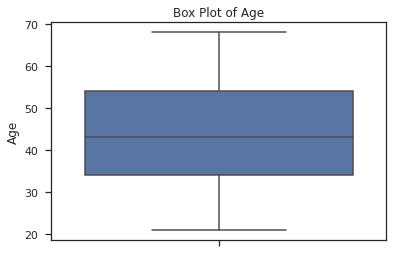

In [603]:
# Create box plot for age column
sns.boxplot(data=data, y='Age')
plt.title('Box Plot of Age')
plt.show()

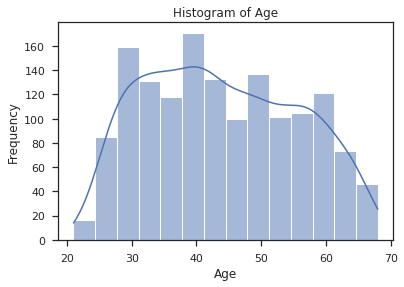

In [604]:
# Create histogram for age column
sns.histplot(data=data, x='Age', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Bivariate analysis with target variable**

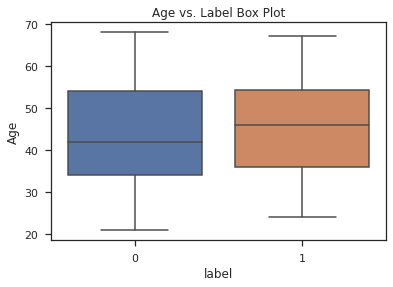

In [605]:
sns.boxplot(x='label', y='Age', data=data)
plt.title('Age vs. Label Box Plot')
plt.show()

Interpretation:

The youngest applicant is 21 years old while the oldest is 68 years old. with the average of 43 and median of 42(outliers insensitive).

Age feature is not normally distributed, it is slightly positively skew.

There is small difference between the average age of high and low risk applicants.

**Marital Status**

In [606]:
data['Marital_status'].describe()

count        1496
unique          5
top       Married
freq         1011
Name: Marital_status, dtype: object

In [607]:
categorical_summary(data, 'Marital_status')

,Category Count,Category Percentage
Married,1011,67.58
Single / not married,218,14.57
Civil marriage,101,6.75
Separated,91,6.08
Widow,75,5.01


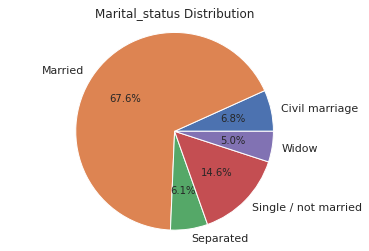

In [608]:
# Group the data by Marital_status and count the number of occurrences
Marital_status_counts = data.groupby('Marital_status')['Marital_status'].count()

# Create a pie chart
plt.pie(Marital_status_counts, labels=Marital_status_counts.index, autopct='%1.1f%%')
plt.title('Marital_status Distribution')
plt.axis('equal')
plt.show()

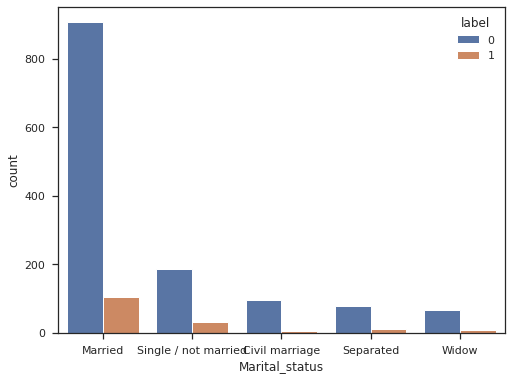

In [609]:
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_status', hue='label', data=data)
plt.show()

Interpretation:

Most applicants are married

Even though we have a higher number of applicants who are separated than those who are widow, it seems like widow applicants are low risk than those who are separated.

**Family Members**

In [610]:
categorical_summary(data, 'Family_Members')

,Category Count,Category Percentage
2,773,51.67
1,322,21.52
3,261,17.45
4,123,8.22
5,15,1.00
6,1,0.07
15,1,0.07


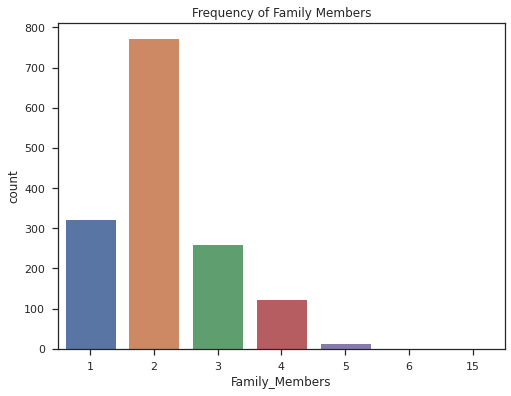

In [611]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family_Members', data=data)
plt.title('Frequency of Family Members')
plt.show()

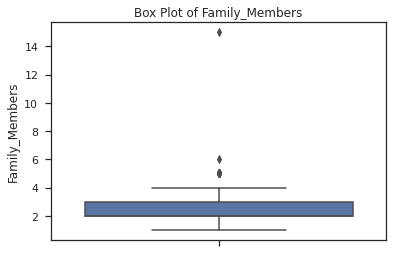

In [612]:
# Create box plot for Family_Members column
sns.boxplot(data=data, y='Family_Members')
plt.title('Box Plot of Family_Members')
plt.show()

Interpretation:

Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child.

We also have 3 outliers, 1 of them is extreme with 15 members in their household.

**Children Count**


In [613]:
data["CHILDREN"].describe()

count   1496.00
mean       0.42
std        0.78
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       14.00
Name: CHILDREN, dtype: float64

In [614]:
categorical_summary(data, 'CHILDREN')

,Category Count,Category Percentage
0,1051,70.25
1,298,19.92
2,129,8.62
3,16,1.07
4,1,0.07
14,1,0.07


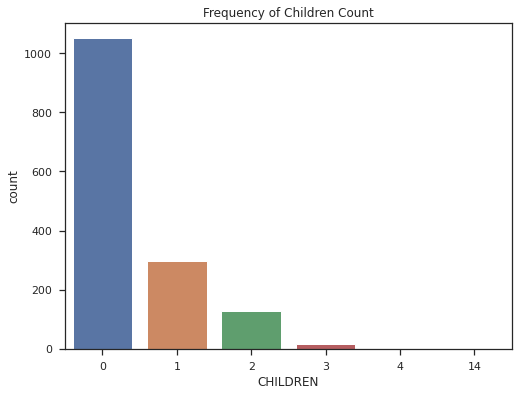

In [615]:
plt.figure(figsize=(8,6))
sns.countplot(x='CHILDREN', data=data)
plt.title('Frequency of Children Count')
plt.show()

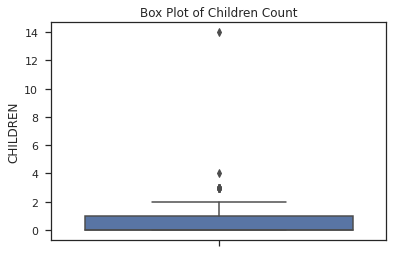

In [616]:
sns.boxplot(data=data, y='CHILDREN')
plt.title('Box Plot of Children Count')
plt.show()

Interpretation:

As previously discussed most applicant don’t have a child

Also here we have 3 outliers, probably the same from the family_members.

**Housing_type**

In [617]:
categorical_summary(data, 'Housing_type')

,Category Count,Category Percentage
House / apartment,1331,88.97
With parents,79,5.28
Municipal apartment,51,3.41
Rented apartment,21,1.40
Office apartment,9,0.60
Co-op apartment,5,0.33


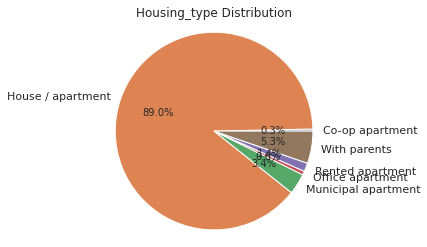

In [618]:
# Group the data by Housing_type and count the number of occurrences
Housing_type_counts = data.groupby('Housing_type')['Housing_type'].count()

# Create a pie chart
plt.pie(Housing_type_counts, labels=Housing_type_counts.index, autopct='%1.1f%%')
plt.title('Housing_type Distribution')
plt.axis('equal')
plt.show()

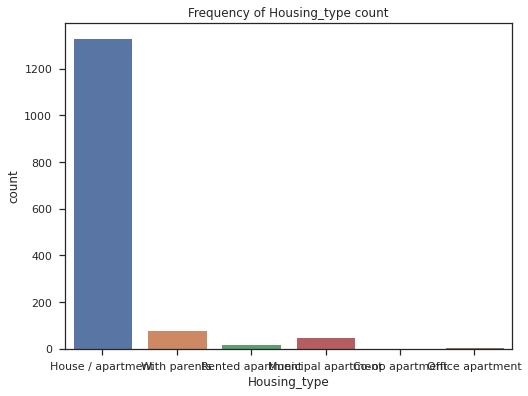

In [619]:
plt.figure(figsize=(8,6))
sns.countplot(x='Housing_type', data=data)
plt.title('Frequency of Housing_type count')
plt.show()

Interpretation:

Almost every applicants live in house or apartment

**Income**

In [620]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data["Annual_income"].describe()

count      1496.00
mean     190775.05
std      113138.37
min       33750.00
25%      121050.00
50%      166050.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64

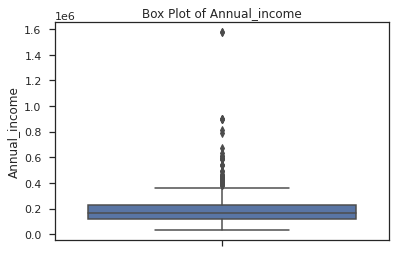

In [621]:
sns.boxplot(data=data, y='Annual_income')
plt.title('Box Plot of Annual_income')
plt.show()

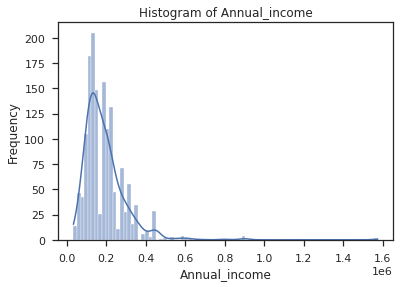

In [622]:
# Create histogram for age column
sns.histplot(data=data, x='Annual_income', kde=True)
plt.title('Histogram of Annual_income')
plt.xlabel('Annual_income')
plt.ylabel('Frequency')
plt.show()

**Bivariate analysis with target variable**

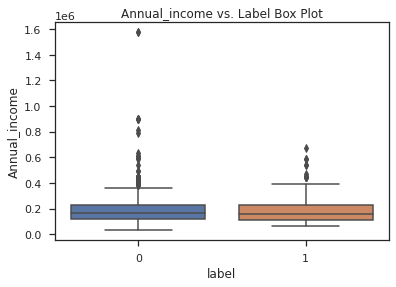

In [623]:
sns.boxplot(x='label', y='Annual_income', data=data)
plt.title('Annual_income vs. Label Box Plot')
plt.show()

Interpretation:

The average income is  190775 but this amount accounts for outliers. If we ignore the outlier most people make 166050.

We have 1 applicant who makes more than 1000000

This feature is positively skewed

High risk and low risk applicants have roughly similar income

Type_Occupation

In [624]:
categorical_summary(data, 'Type_Occupation')

,Category Count,Category Percentage
Unknown,471,31.48
Laborers,259,17.31
Core staff,171,11.43
Managers,130,8.69
Sales staff,118,7.89
Drivers,85,5.68
High skill tech staff,62,4.14
Medicine staff,49,3.28
Accountants,42,2.81
Security staff,24,1.60


In [625]:
fig = px.histogram(data, x="Type_Occupation", color="Type_Occupation",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="Type of Occupation Distribution",width=800, height=400)
fig.update_layout(xaxis_title="Type of Occupation", yaxis_title="Count")
fig.show()

Interpretation:

The most prolific Job title is laborers by far.

We have 31.48% of missing data.

**Type_Income**

In [626]:
categorical_summary(data, 'Type_Income')

,Category Count,Category Percentage
Working,769,51.40
Commercial associate,353,23.60
Pensioner,259,17.31
State servant,115,7.69


In [627]:
fig = px.histogram(data, x="Type_Income", color="Type_Income",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="Type of Income Distribution", width=800, height=400)
fig.update_layout(xaxis_title="Type of Income", yaxis_title="Count")
fig.show()

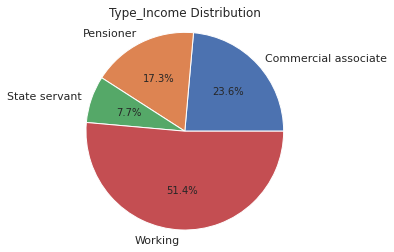

In [628]:
# Group the data by Type_Income and count the number of occurrences
Type_Income_counts = data.groupby('Type_Income')['Type_Income'].count()

# Create a pie chart
plt.pie(Type_Income_counts, labels=Type_Income_counts.index, autopct='%1.1f%%')
plt.title('Type_Income Distribution')
plt.axis('equal')
plt.show()

Interpretation:

Most applicants are employed

**EDUCATION**

In [629]:
fig = px.histogram(data, x="EDUCATION", color="EDUCATION",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="EDUCATION Distribution", width=800, height=400)
fig.update_layout(xaxis_title="Type of EDUCATION", yaxis_title="Count")
fig.show()

In [630]:
fig = px.pie(data, names='EDUCATION', width=800, height=400)
fig.show()

Interpretation:

The majority of applicants have completed their secondary degree, ¼(One- Fourth) completed their higher education.

**Experience**

In [631]:
data["Experience"].describe()

count   1496.00
mean       7.33
std        6.37
min        0.20
25%        2.80
50%        5.65
75%        9.70
max       40.80
Name: Experience, dtype: float64

In [632]:
# create a box plot for the experience column
fig = px.box(data, y="Experience", title="Experience Box Plot",width=800, height=400)

# show the plot
fig.show()

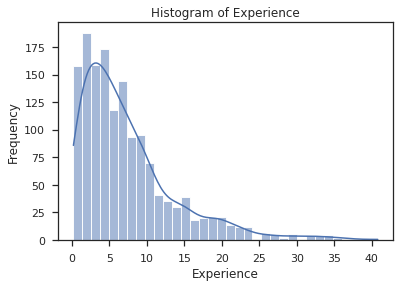

In [633]:
# Create histogram for Experience column
sns.histplot(data=data, x='Experience', kde=True)
plt.title('Histogram of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

**Bivariate analysis with target variable**

In [634]:
fig = px.box(data, x="label", y="Experience", color="label",width=800, height=400)
fig.show()


Interpretation:

Most of applicant have been working for 3 to 6 years on average.

We have quite a number of outliers who have been working for more than 20 years+.

The Experience variable is positively skewed

Those who are high risk have a low employment length of 3 versus 6 years for the low risk

**Car_Owner**

In [635]:
categorical_summary(data, 'Car_Owner')

,Category Count,Category Percentage
N,898,60.03
Y,598,39.97


In [636]:
fig = px.histogram(data_frame=data, x='Car_Owner', color='Car_Owner', barmode='group', width=800, height=400)
fig.show()

Interpretation:

Most applicant don’t own a car

**Property_Owner**

In [637]:
categorical_summary(data, 'Property_Owner')

,Category Count,Category Percentage
Y,977,65.31
N,519,34.69


In [638]:
fig = px.histogram(data_frame=data, x='Property_Owner', color='Property_Owner', barmode='group', width=800, height=400)
fig.show()

Interpretation:

Most applicants own a property

**Has a work phone**

In [639]:
categorical_summary(data, 'Work_Phone')

,Category Count,Category Percentage
0,1188,79.41
1,308,20.59


In [640]:
fig = px.histogram(data_frame=data, x='Work_Phone', color='Work_Phone', barmode='group', width=800, height=400)
fig.show()

Interpretation:

More than ¾ of applicants don’t have a work phone

**Mobile_phone**

In [641]:
categorical_summary(data, 'Mobile_phone')

,Category Count,Category Percentage
1,1496,100.00


Interpretation:

All the applicants without exception have a mobile phone

**Phone**

In [642]:
categorical_summary(data, 'Phone')

,Category Count,Category Percentage
0,1040,69.52
1,456,30.48


In [643]:
fig = px.histogram(data_frame=data, x='Phone', color='Phone', barmode='group', width=800, height=400)
fig.show()

Interpretation:

Most applicants don’t have a phone (probably a home phone)

**EMAIL_ID**

In [644]:
categorical_summary(data, 'EMAIL_ID')

,Category Count,Category Percentage
0,1355,90.57
1,141,9.43


In [645]:
fig = px.histogram(data_frame=data, x='EMAIL_ID', color='EMAIL_ID', barmode='group', width=800, height=400)
fig.show()

Interpretation:

More than 90% of applicants don’t have an email

**Label(Target Vaariable)**

In [646]:
categorical_summary(data, 'label')

,Category Count,Category Percentage
0,1336,89.30
1,160,10.70


In [647]:
fig = px.histogram(data_frame=data, x='label', color='label', barmode='group', width=800, height=400)
fig.show()

Interpretation:

A vast majority of applicants are Approved applicants.
We have a very imbalance data.

# **Bivariate analysis**

**Numerical vs numerical features (Correlation & scatter plots)**

**Scatter plots**

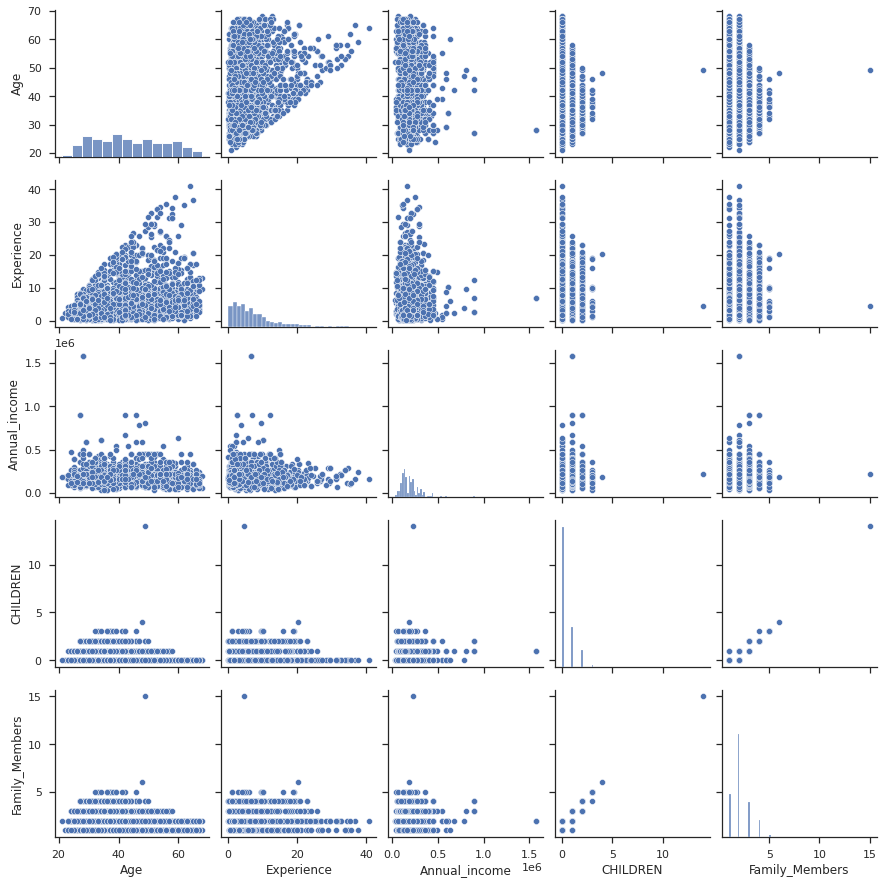

In [648]:
numerical_cols = ['Age', 'Experience', 'Annual_income','CHILDREN','Family_Members']

# Create a scatter matrix
sns.set_theme(style="ticks")
sns.pairplot(data[numerical_cols])

Interpretation:

We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.

Another interesting trend is the experience and age. This also makes sense, the longer the employee has been working, the older they are.

**Family member count vs children count (numerical vs numerical feature comparison)**

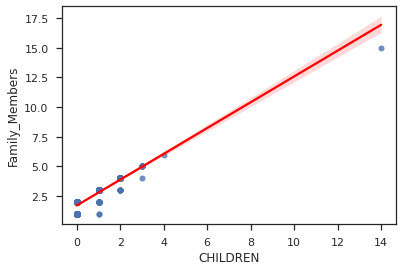

In [649]:
sns.regplot(x='CHILDREN',y='Family_Members',data=data,line_kws={'color': 'red'})
plt.show()


Interpretation:

The more children a person has, the larger the family member count.

**Experience vs age (numerical vs numerical feature comparison)**

In [650]:
scatter_plot = px.scatter(data, x='Experience', y='Age', color='Experience',
                          width=800, height=400, title='Scatter plot of Age vs Experience')
scatter_plot.show()

Interpretation:

This scatterplot shows that the age of the applicants is correlated with the Experience

The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the Experience. You can't have an Experience > than the age.

# **Correlation analysis**

In [651]:
# change the datatype of target feature to int
label_int = data['label'].astype('int32')

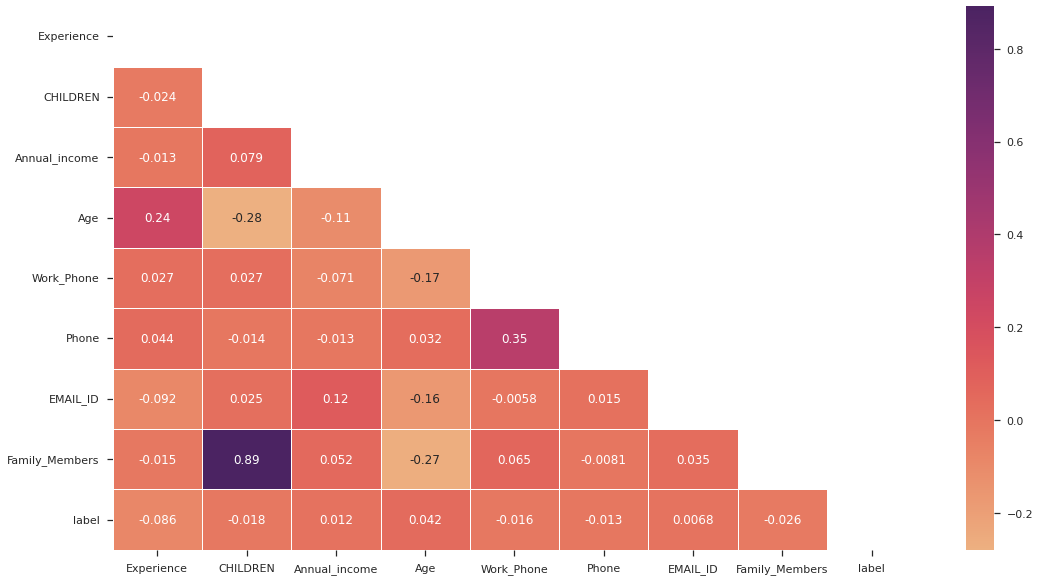

In [652]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
data_without_mobile_corr = pd.concat([data.drop(['Mobile_phone','label'], axis=1),label_int],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(data_without_mobile_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(data_without_mobile_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

Interpretation:

There is no feature that is correlated with the target feature

Family member count is highly correlated with children count as previously discussed

Age has some positive correlation with the family member count and children count. The older a person is, the most likely he/she will have a larger family.

Another positive correlation is having a phone and having a work phone.

The final positive correlation is between the age and work phone. The younger someone is the less likely he/she will have a work phone.

We also have a negative correlation between the employment length and the age as previously seen.

# **Numerical vs categorical features (ANOVA)**
 **Age vs the rest of categorical features**

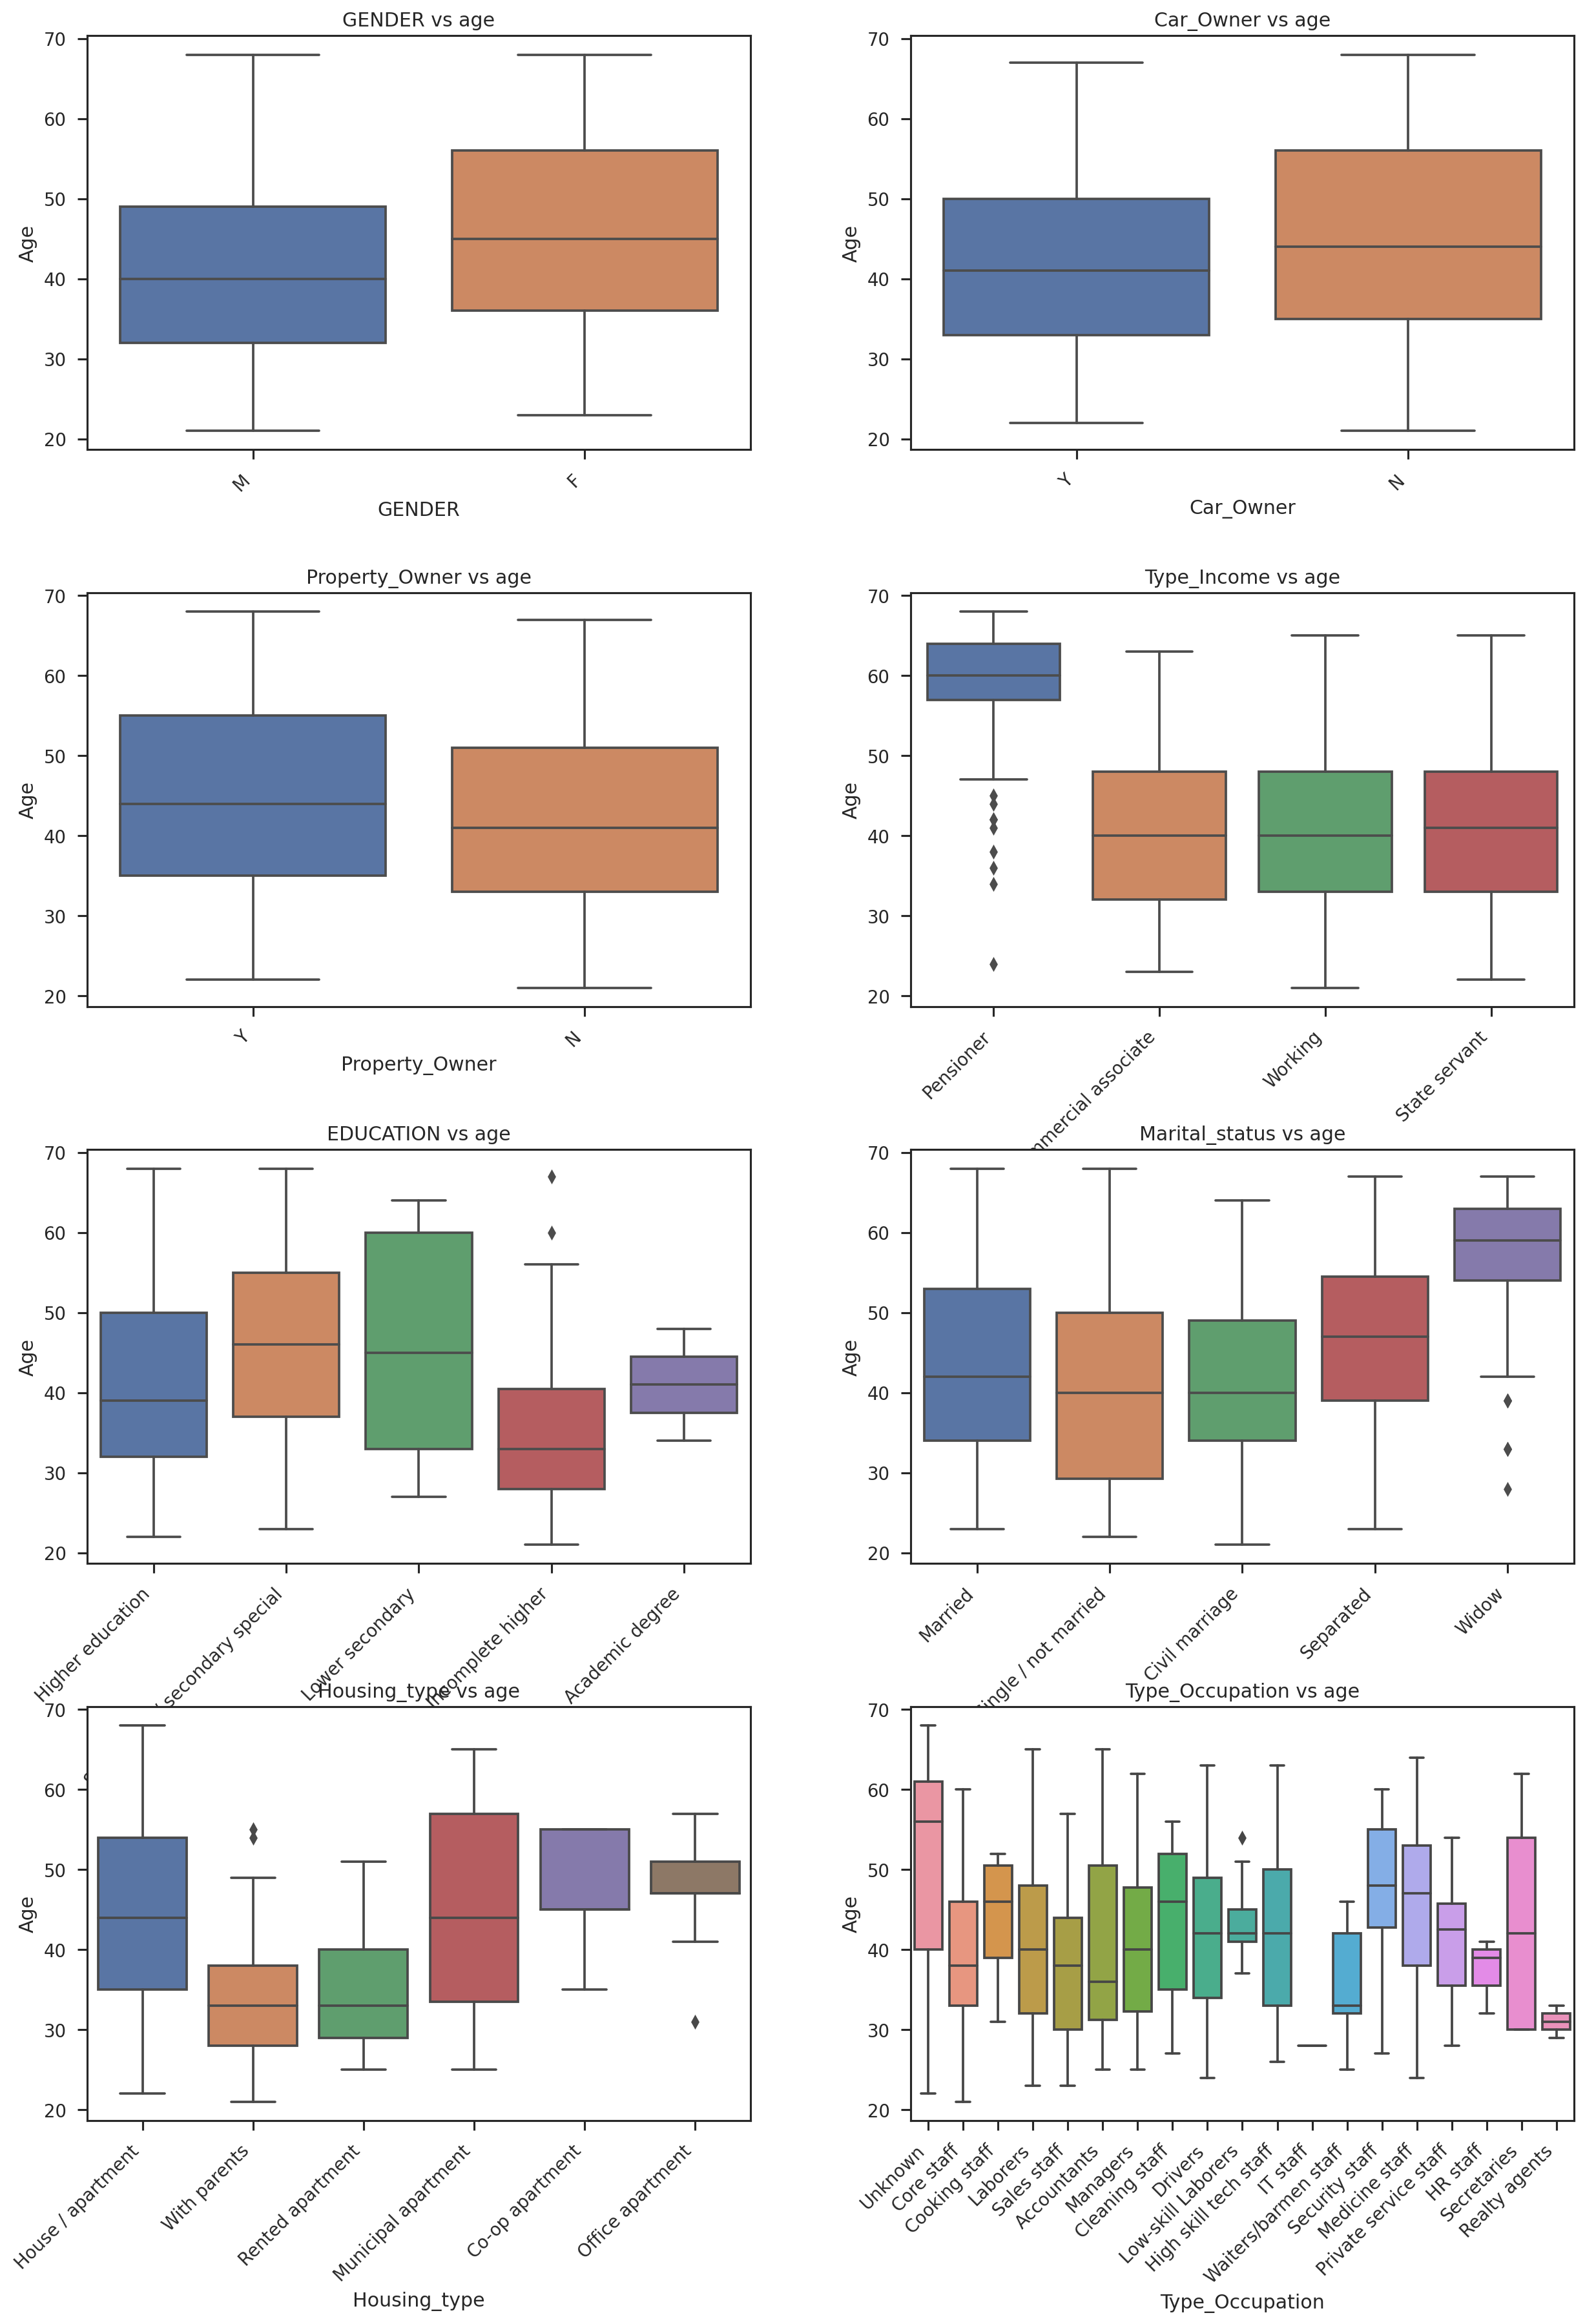

In [653]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=np.abs(data['Age']))
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

plt.show()

Interpretation:

Female applicants are older than their male counterpart.

Those who don't own a car tend to be older.

Those who own a property tend to be older than those who don't.

Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).

It is also interesting to see that those who have not completed their higher education degree are younger in general than the other groups.

Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.

With no surprise, those who live with parent tend to be younger. We also see some outlier as well.

Lastly, who work as security staff tend to be older while those who work in sales tend to be younger.

**Income vs the rest of categorical features**

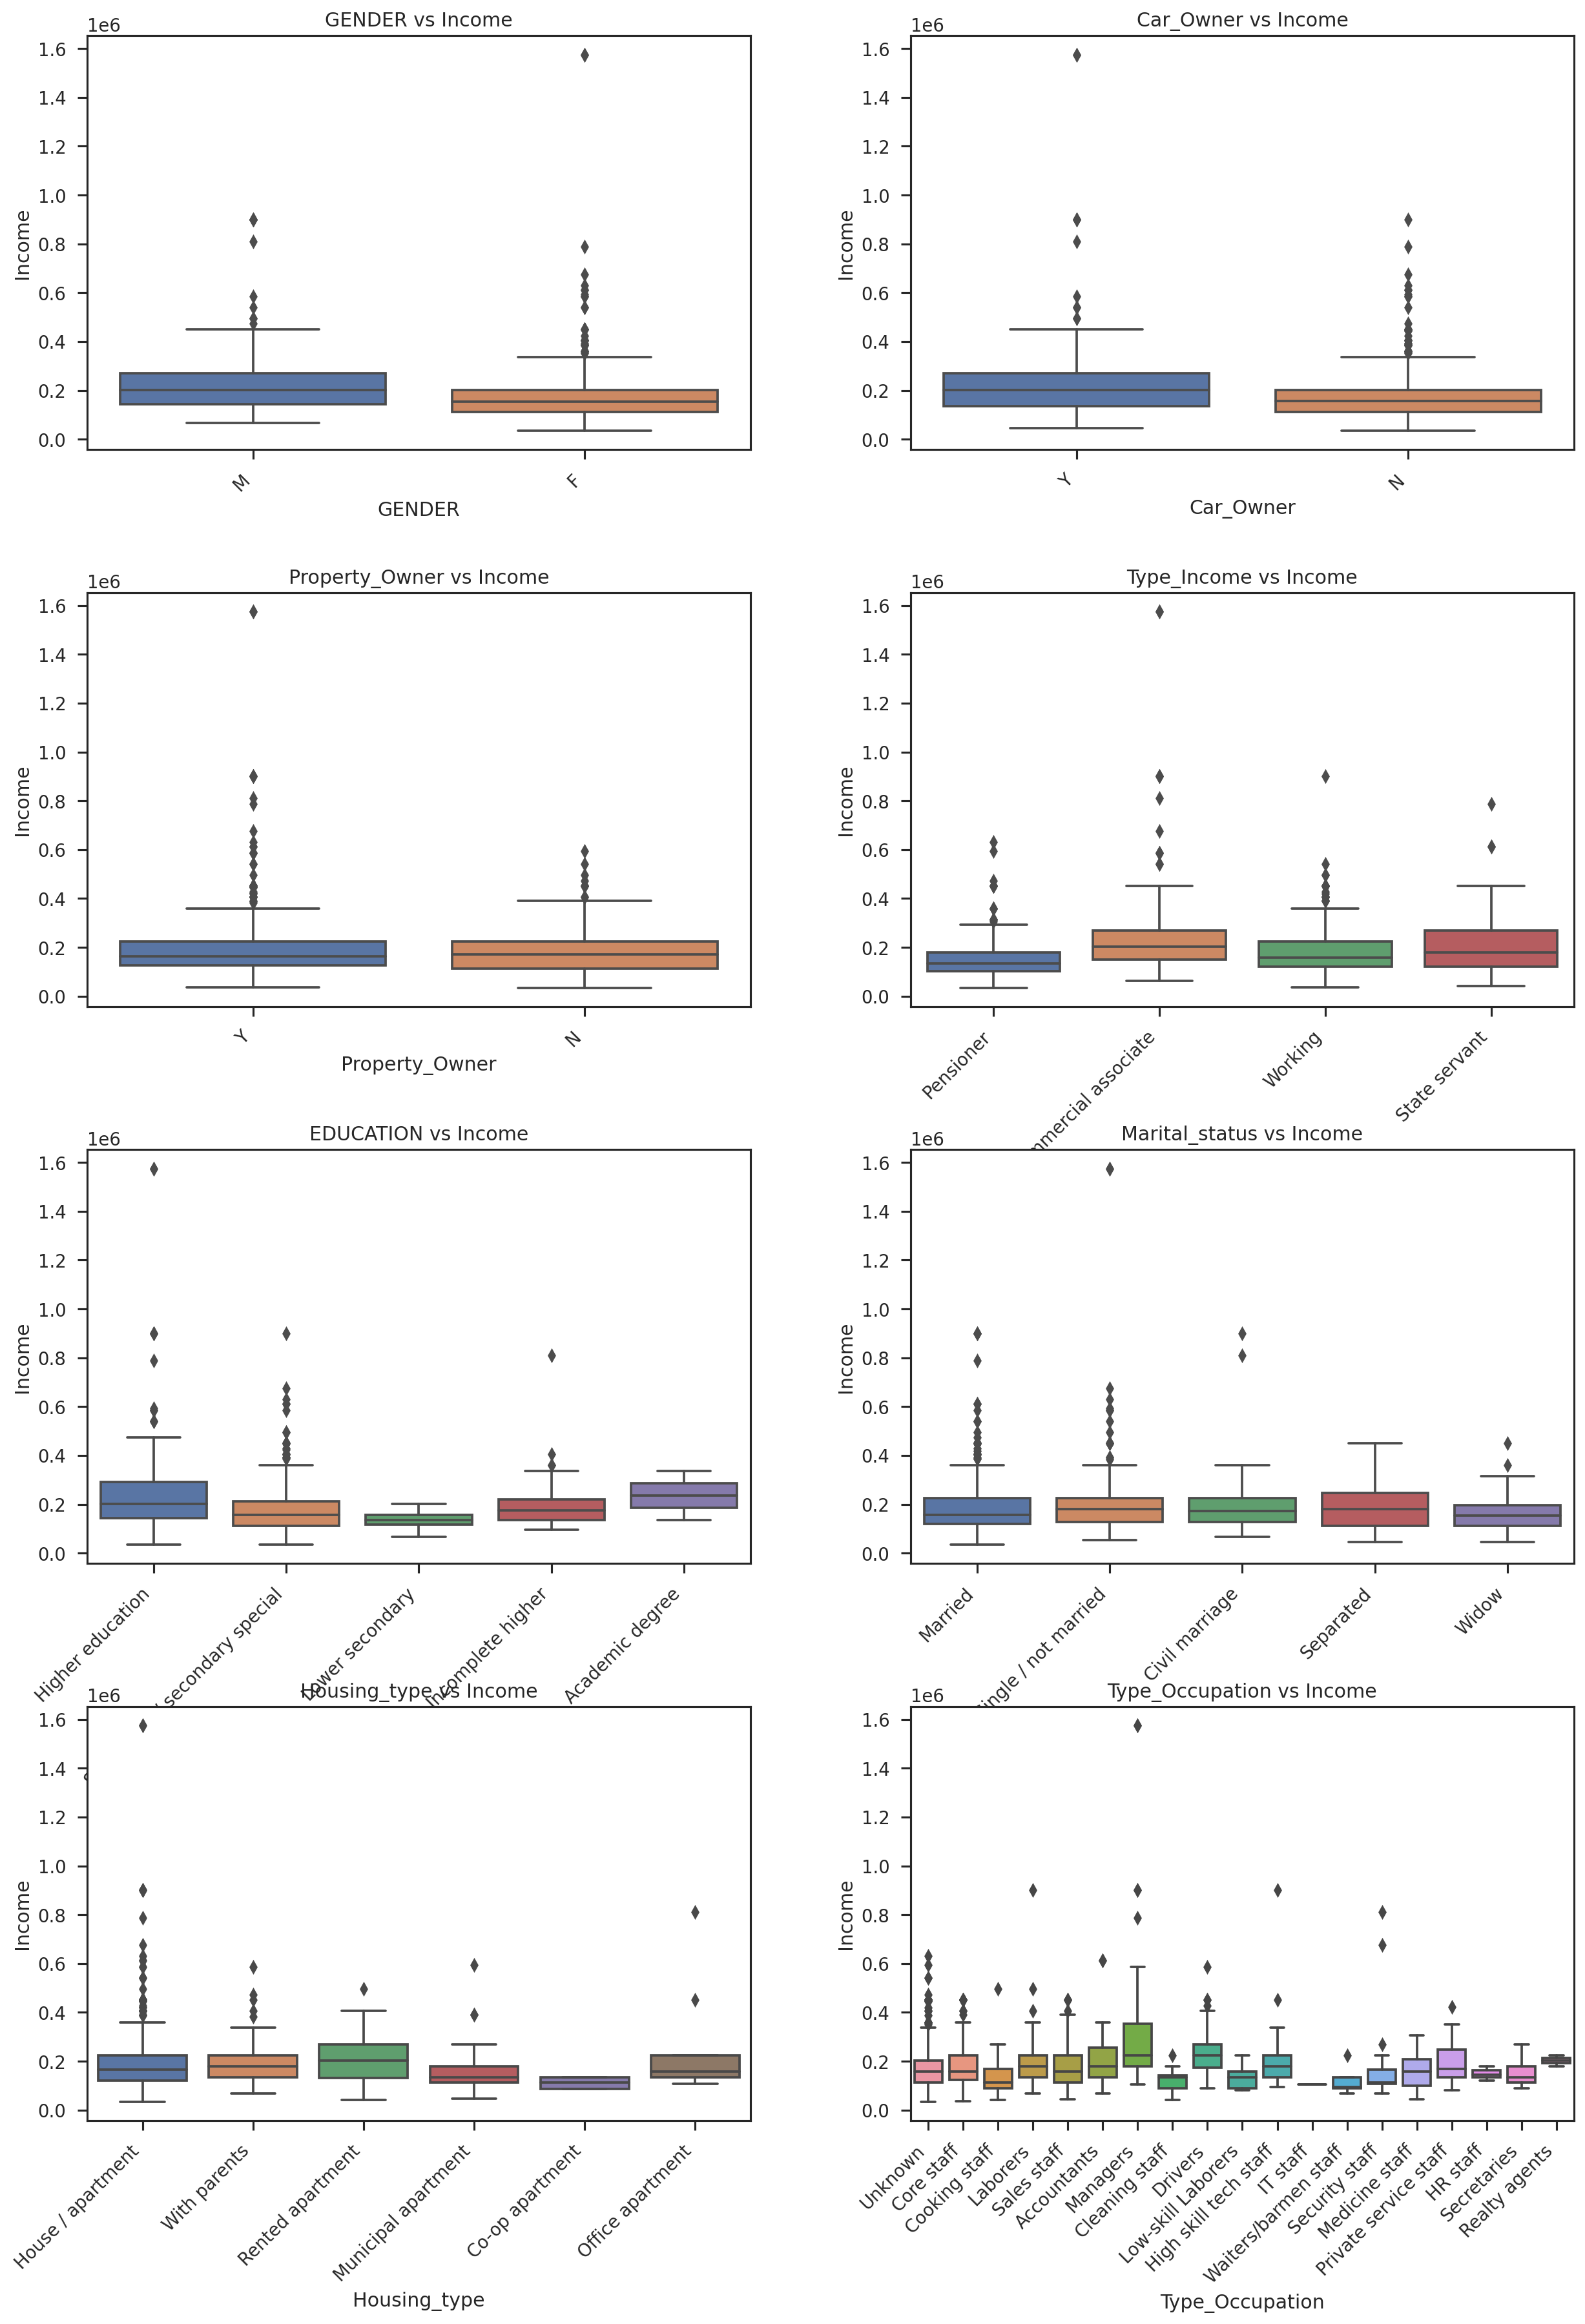

In [654]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=data["Annual_income"])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Income")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Income')
            cat_ft_count += 1
    break

plt.show()

Interpretation:

Commercial Associate applicant tend to have been employed longer than the rest.

Those who work in the managerial field, have been employed longer than the rest.

# Categorical vs categorical features (Chi-square test)

Null hypothesis: The feature's categories have no effect on the target variable

Alternative hypothesis (one or more) of the feature categories has a signifcant effect on the target valriable 

In [655]:
data.columns

Index(['Experience', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [656]:
def chi_func(feature):
    # selection row with high risk
    label_feature = data[data['label'] == 1][feature]
    label_feature_cat = pd.crosstab(index=label_feature, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    label_feature_cat.index.name = None
    # observed values
    obs = label_feature_cat
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

In [657]:
cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
for ft in cat_features:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** GENDER ****

Observed values:

   Count
F     89
M     71


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  80.00
M  80.00


Chi-square:

2.025


Critical value:

3.841458820694124


P-value:

[0.15472892]


Fail to reject the null hypothesis


**** Car_Owner ****

Observed values:

   Count
N    101
Y     59


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

11.025


Critical value:

3.841458820694124


P-value:

[0.00089891]


Reject the null hypothesis


**** Property_Owner ****

Observed values:

   Count
N     58
Y    102


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

12.1


Critical value:

3.841458820694124


P-value:

[0.00050422]


Reject the null hypothesis


**** Type_Income ****

Observed values:

                      Count
Commercial associate     46
Pensioner                37
State servant             5
Working                  72


Index(['Commercial ass

# Business findings from the EDA
*Typical profile of an applicant is: a Female in her early 40’s, married with a partner and no child. She has been employed for 5 years with a salary of 166050. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment).*

*Age and income do not have any effects on the target variable*

*Those who are flagged as bad client, tend to have a shorter Experience. They also constitute less than 2% of total applicants.*

# **Preparing the Data for the ML Part**


## **Transformation To be done On Each Feature:**

## **Data Cleaning**

## **Feature Selection**

**DROP Features**

**Why are we droping these features?**

ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.

Mobile_phone: Since everyone has a mobile phone, this feature does not inform us about anything.

Children : is highly correlated with Family member count, and to avoid multicollinearity, we drop it.

Type_Occupation: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.

In [658]:
data_ml_full= df.copy()

**Split the data into training and test sets, creating a copy of the datasets**

In [659]:
train_data_ml, test_data_ml = train_test_split(data_ml_full, test_size=0.2, random_state=42)

In [660]:
train_data_ml

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
680,5045113,F,N,Y,0,202500.00,Pensioner,Secondary / secondary special,Widow,House / apartment,-21126.00,365243,1,0,0,0,NaN,1,0
1079,5142781,M,Y,N,2,157500.00,Working,Secondary / secondary special,Separated,With parents,-13979.00,-1626,1,0,0,0,Laborers,3,0
1190,5113711,F,Y,Y,1,405000.00,State servant,Secondary / secondary special,Married,House / apartment,-16962.00,-407,1,0,1,1,Laborers,3,0
864,5069117,F,N,Y,0,180000.00,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-20577.00,365243,1,0,0,0,NaN,1,0
743,5117561,F,N,N,0,135000.00,Working,Secondary / secondary special,Married,House / apartment,NaN,-645,1,1,0,0,Laborers,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,5089632,F,N,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-16188.00,-309,1,1,1,1,Sales staff,2,0
1294,5010498,M,Y,Y,1,202500.00,Working,Secondary / secondary special,Married,House / apartment,-10218.00,-313,1,1,0,0,NaN,3,0
860,5021879,M,Y,N,2,112500.00,Working,Secondary / secondary special,Married,House / apartment,-13095.00,-217,1,0,1,0,Laborers,4,0
1459,5068324,F,N,Y,0,171000.00,Working,Higher education,Married,House / apartment,-18348.00,-3853,1,0,0,0,High skill tech staff,2,0


In [661]:
test_data_ml

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
30,5029028,F,N,Y,0,90000.00,Working,Lower secondary,Single / not married,Rented apartment,-12026.00,-4770,1,0,0,0,Cleaning staff,2,1
1514,5051097,F,N,N,0,69750.00,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-21986.00,365243,1,0,1,0,NaN,1,0
1182,5028990,F,N,N,2,81000.00,Working,Lower secondary,Single / not married,House / apartment,-15373.00,-2333,1,0,0,0,Sales staff,3,0
1205,5145968,F,N,Y,0,112500.00,Pensioner,Secondary / secondary special,Widow,House / apartment,-23018.00,365243,1,0,0,0,NaN,1,0
528,5052755,M,N,Y,0,225000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-10570.00,-1175,1,0,0,0,Managers,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5078805,F,N,Y,0,306000.00,Working,Secondary / secondary special,Married,House / apartment,-18927.00,-2978,1,0,0,0,High skill tech staff,2,0
1065,5029529,M,Y,Y,0,112500.00,Pensioner,Lower secondary,Married,House / apartment,-21719.00,365243,1,0,1,0,NaN,2,0
1345,5146002,M,Y,Y,0,225000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-10177.00,-189,1,0,0,1,Managers,1,0
485,5062713,F,N,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-14510.00,-3805,1,0,0,0,Core staff,3,0


In [662]:
data_ml= train_data_ml.copy()

In [663]:
data_ml.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)

In [664]:
data_ml.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count',
       'Employed_days', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label'],
      dtype='object')

In [665]:
#Converting Birthday_Count in days to years
data_ml['Birthday_count'] = abs(data_ml['Birthday_count'] / 365)
data_ml['Birthday_count'] = data_ml['Birthday_count'].round()

In [666]:
# Convert the "Employed_days" column from days to years and make negative values positive
data_ml['Employed_days'] = abs(data_ml['Employed_days'] / 365.25)
data_ml['Employed_days'] = round(data_ml['Employed_days'], 1)

In [667]:
data_ml= data_ml.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [668]:
data_ml= data_ml.dropna()

Feature Encoding

GENDER - [Nominal Data]

Car_Owner - [Nominal Data]

Work_Phone - [Nominal Data]

Marital_Status - [Nominal Data]

Housing_type - [Nominal Data]

Type_Income - [Nominal Data]

As all of these data are Nominal we will use the Pd.get_dummies [Dummy Variable] to convert them into the Numerical Values and will use the drop_first function of the get_dummies function to get rid of the dummy trap .

In [669]:
data_encoded = data_ml.copy()


In [670]:
dummy_features = pd.get_dummies(data_encoded[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml= data_ml.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml = pd.concat([data_ml,dummy_features],axis=1)

In [671]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml['Education_level_Encoded'] = encoder.fit_transform(data_ml[['EDUCATION']])
# drop the original Education_level column
data_ml.drop('EDUCATION', axis=1, inplace=True)

In [672]:
# Replacing the 1000 in Employed Years with np.NaN and 
# Will do the Imputations
data_ml["Employed_Years"] = data_ml["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/1198 with 1 missing, elapsed time: 0.319
Imputing row 101/1198 with 0 missing, elapsed time: 0.321
Imputing row 201/1198 with 0 missing, elapsed time: 0.322
Imputing row 301/1198 with 0 missing, elapsed time: 0.323
Imputing row 401/1198 with 0 missing, elapsed time: 0.324
Imputing row 501/1198 with 0 missing, elapsed time: 0.325
Imputing row 601/1198 with 0 missing, elapsed time: 0.326
Imputing row 701/1198 with 0 missing, elapsed time: 0.327
Imputing row 801/1198 with 0 missing, elapsed time: 0.328
Imputing row 901/1198 with 0 missing, elapsed time: 0.329
Imputing row 1001/1198 with 1 missing, elapsed time: 0.330
Imputing row 1101/1198 with 0 missing, elapsed time: 0.331


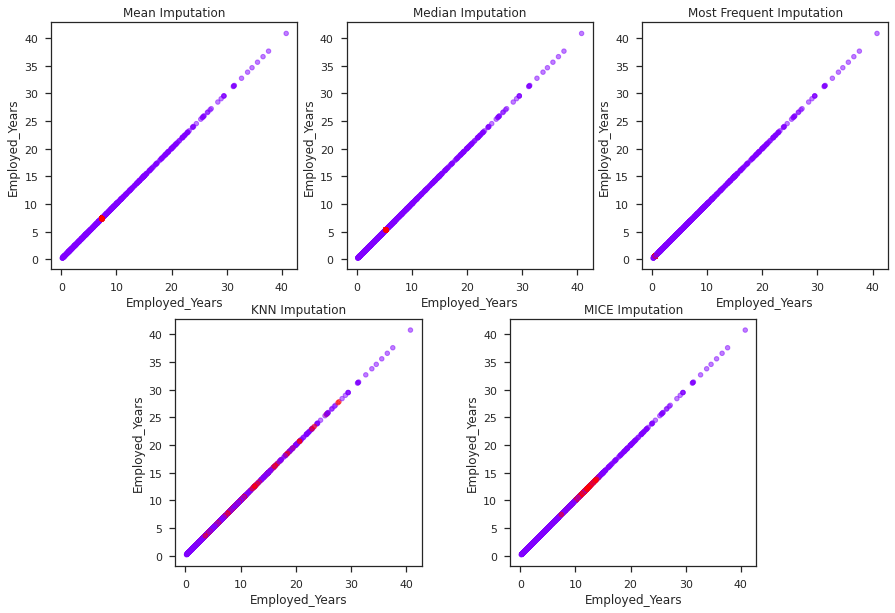

In [673]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
imputer_median = data_ml.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
from sklearn.impute import SimpleImputer
imputer_mode = data_ml.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
imputer_knn = data_ml.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml['Employed_Years'].isnull() + data_ml['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

In [674]:
data_ml= imputer_knn.copy()

**HANDLING OUTLIERS**

<Axes: >

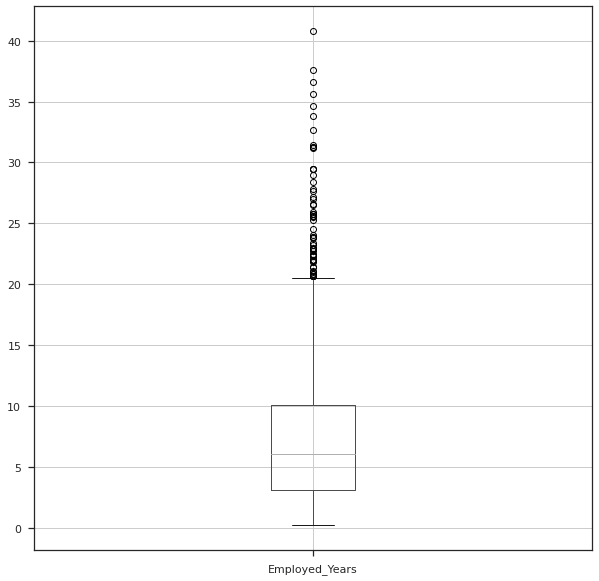

In [675]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

<Axes: >

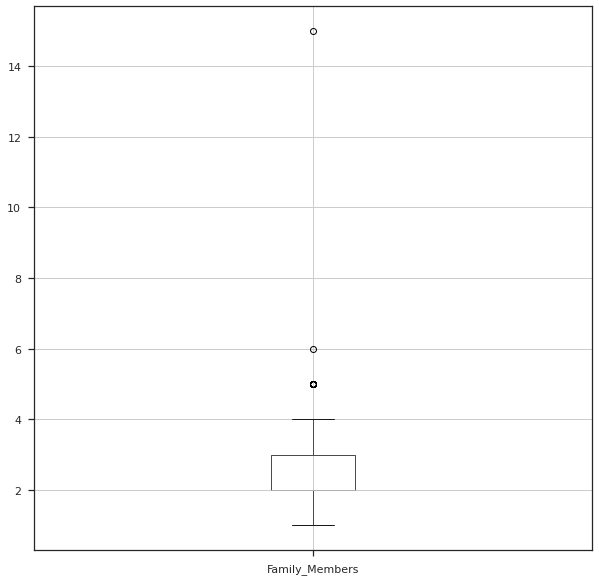

In [676]:
df_o = pd.DataFrame(data = data_ml, columns = ["Family_Members"])
df_o.boxplot(figsize=(10,10))

<Axes: >

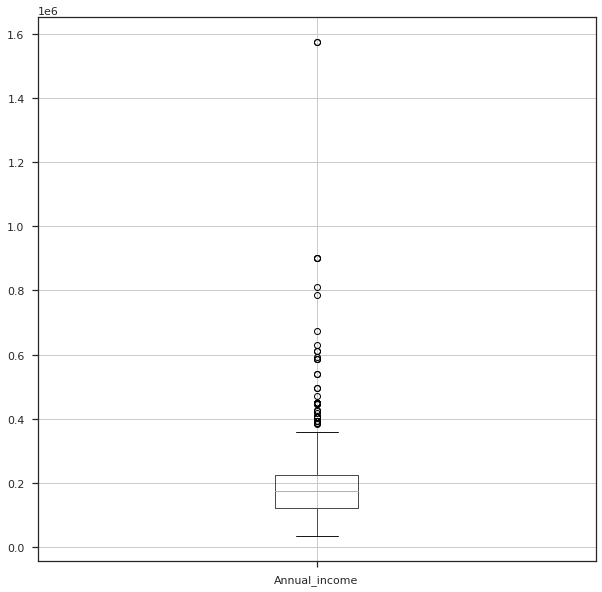

In [677]:
df_o = pd.DataFrame(data = data_ml, columns = ["Annual_income"])
df_o.boxplot(figsize=(10,10))

In [678]:
df_out = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_Members","Annual_income"])

In [679]:
outliers_list = ["Family_Members","Annual_income","Employed_Years"]

In [680]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [681]:
for i in outliers_list:
    data_ml[i] = ohiqr(df_out[i])

<Axes: >

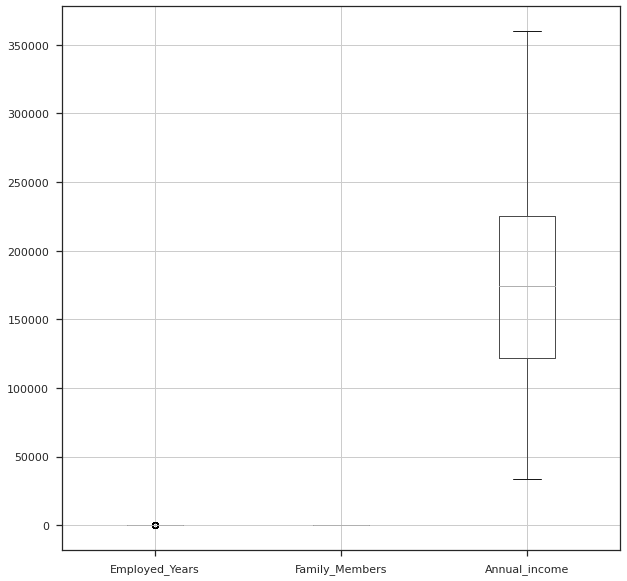

In [682]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_Members","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

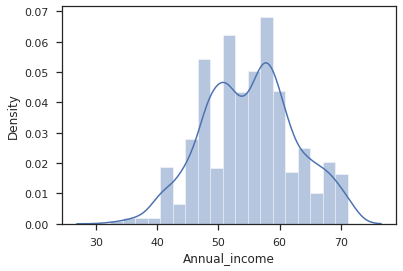

In [683]:
# cube root transformation
data_ml['Annual_income'] = np.cbrt(data_ml['Annual_income'])
sns.distplot(data_ml['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

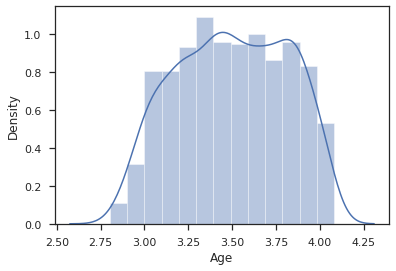

In [684]:
# cube root transformation
data_ml['Age'] = np.cbrt(data_ml['Age'])
sns.distplot(data_ml['Age'])

In [685]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml[cols_to_scale] = scaler.fit_transform(data_ml[cols_to_scale])

# Check the scaled columns
print(data_ml[cols_to_scale])


      Age  Annual_income  Employed_Years
680  0.84           0.68            0.27
1079 0.44           0.56            0.21
1190 0.61           0.66            0.04
864  0.80           0.62            0.52
233  0.18           0.66            0.33
...   ...            ...             ...
1130 0.57           0.92            0.03
1294 0.18           0.68            0.03
860  0.39           0.41            0.02
1459 0.69           0.60            0.51
1126 0.18           0.41            0.06

[1198 rows x 3 columns]


In [686]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 680 to 1126
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Annual_income            1198 non-null   float64
 1   Age                      1198 non-null   float64
 2   Employed_Years           1198 non-null   float64
 3   Phone                    1198 non-null   float64
 4   EMAIL_ID                 1198 non-null   float64
 5   Family_Members           1198 non-null   float64
 6   label                    1198 non-null   float64
 7   Work_Phone               1198 non-null   float64
 8   Male                     1198 non-null   float64
 9   Car                      1198 non-null   float64
 10  Property                 1198 non-null   float64
 11  Married                  1198 non-null   float64
 12  Separated                1198 non-null   float64
 13  Single                   1198 non-null   float64
 14  Widow                 

In [687]:
data_ml['label'] = pd.to_numeric(data_ml['label'])


In [688]:
oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml.loc[:, data_ml.columns != 'label'],data_ml['label'])
data_ml = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [689]:
# split the train data into X and y (target)
X_train, y_train = data_ml.loc[:, data_ml.columns != 'label'], data_ml['label'].astype('int64')

# **REPEATING ALL PREPROCESSING STEPS ON TEST DATA ALSO**

In [690]:
data_ml_test= test_data_ml.copy()

In [691]:
data_ml_test.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)

In [692]:
#Converting Birthday_Count in days to years
data_ml_test['Birthday_count'] = abs(data_ml_test['Birthday_count'] / 365)
data_ml_test['Birthday_count'] = data_ml_test['Birthday_count'].round()

In [693]:
# Convert the "Employed_days" column from days to years and make negative values positive
data_ml_test['Employed_days'] = abs(data_ml_test['Employed_days'] / 365.25)
data_ml_test['Employed_days'] = round(data_ml_test['Employed_days'], 1)

In [694]:
data_ml_test= data_ml_test.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [695]:
data_ml_test= data_ml_test.dropna()

In [696]:
data_encoded_test = data_ml_test.copy()


In [697]:
dummy_features = pd.get_dummies(data_encoded_test[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml_test= data_ml_test.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml_test = pd.concat([data_ml_test,dummy_features],axis=1)

In [698]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml_test['Education_level_Encoded'] = encoder.fit_transform(data_ml_test[['EDUCATION']])
# drop the original Education_level column
data_ml_test.drop('EDUCATION', axis=1, inplace=True)

In [699]:
# Replacing the 1000 in Employed Years with np.NaN and 
# Will do the Imputations
data_ml_test["Employed_Years"] = data_ml_test["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/298 with 0 missing, elapsed time: 0.022
Imputing row 101/298 with 0 missing, elapsed time: 0.024
Imputing row 201/298 with 0 missing, elapsed time: 0.025


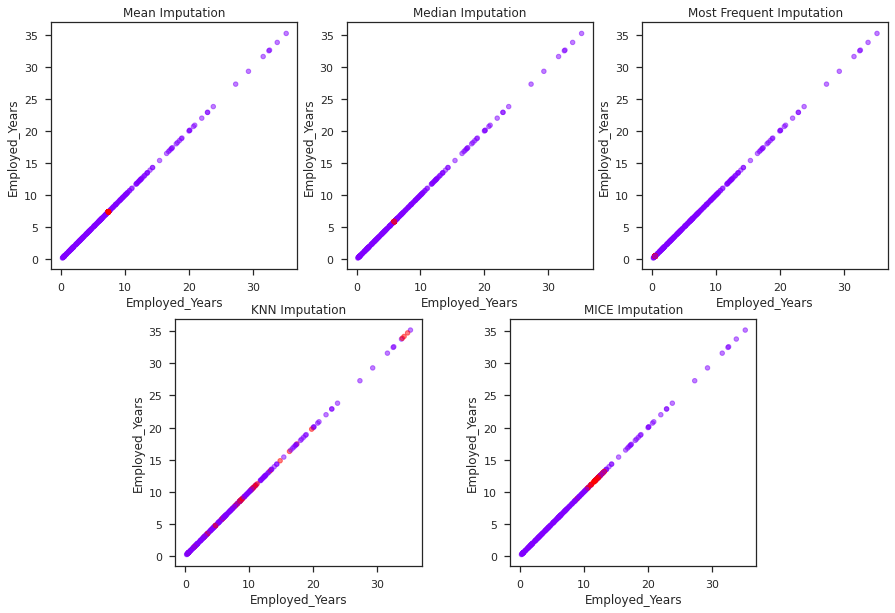

In [700]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml_test.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
imputer_median = data_ml_test.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
from sklearn.impute import SimpleImputer
imputer_mode = data_ml_test.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
imputer_knn = data_ml_test.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml_test.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml_test['Employed_Years'].isnull() + data_ml_test['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

In [701]:
data_ml_test= imputer_knn.copy()

<Axes: >

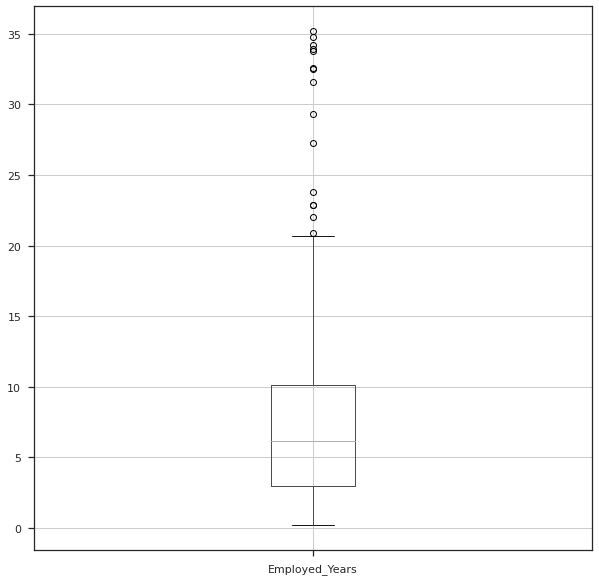

In [702]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

<Axes: >

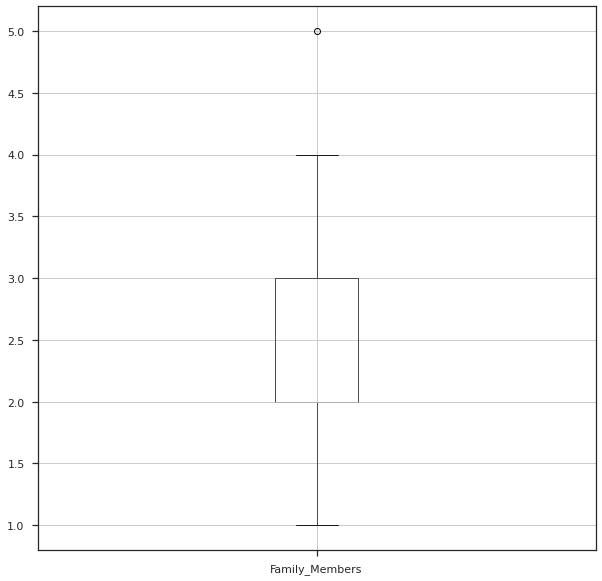

In [703]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Family_Members"])
df_o.boxplot(figsize=(10,10))

<Axes: >

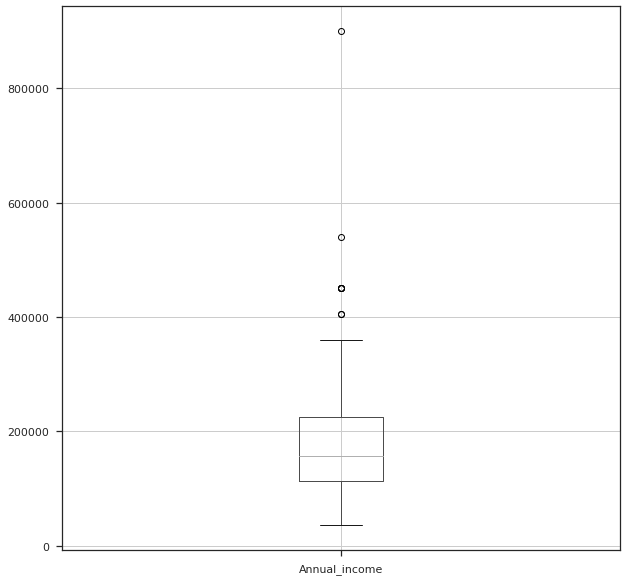

In [704]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Annual_income"])
df_o.boxplot(figsize=(10,10))

In [705]:
df_out = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])

In [706]:
outliers_list = ["Family_Members","Annual_income","Employed_Years"]

In [707]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [708]:
for i in outliers_list:
    data_ml_test[i] = ohiqr(df_out[i])

<Axes: >

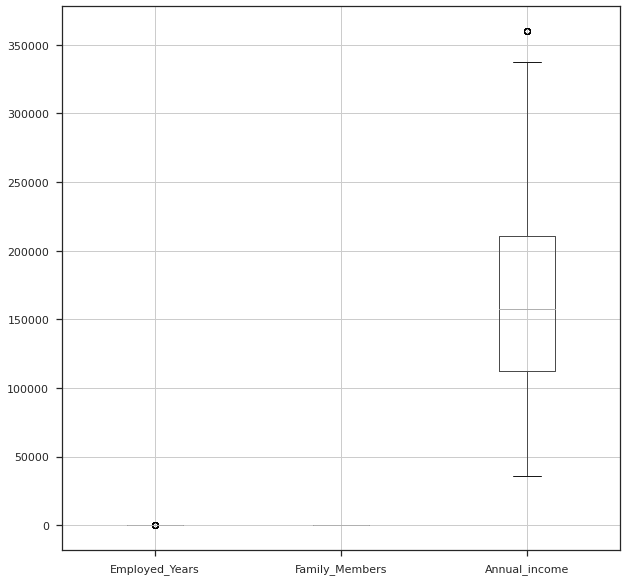

In [709]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

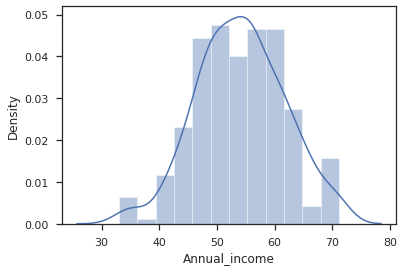

In [710]:
# cube root transformation
data_ml_test['Annual_income'] = np.cbrt(data_ml_test['Annual_income'])
sns.distplot(data_ml_test['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

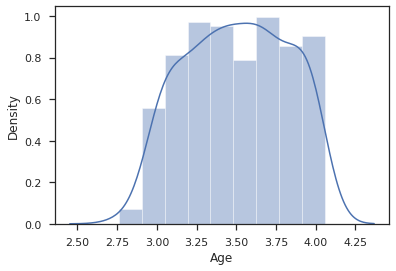

In [711]:
# cube root transformation
data_ml_test['Age'] = np.cbrt(data_ml_test['Age'])
sns.distplot(data_ml_test['Age'])

In [712]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml_test[cols_to_scale] = scaler.fit_transform(data_ml_test[cols_to_scale])

# Check the scaled columns
print(data_ml_test[cols_to_scale])


      Age  Annual_income  Employed_Years
30   0.34           0.31            0.63
1514 0.89           0.21            0.15
1182 0.55           0.27            0.30
1205 0.94           0.40            0.16
528  0.24           0.73            0.15
...   ...            ...             ...
1228 0.75           0.90            0.39
1065 0.89           0.40            0.41
1345 0.21           0.73            0.01
485  0.51           0.55            0.50
874  0.53           0.55            0.14

[298 rows x 3 columns]


In [713]:
data_ml_test['label'] = pd.to_numeric(data_ml_test['label'])


In [714]:
oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml_test.loc[:, data_ml_test.columns != 'label'],data_ml_test['label'])
data_ml_test = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [715]:
# split the train data into X and y (target)
X_test, y_test = data_ml_test.loc[:, data_ml_test.columns != 'label'], data_ml_test['label'].astype('int64')

# **MODELS TRAINING**

### **LOGISTIC REGRESSION**

In [716]:
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [717]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [718]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [719]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [720]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[161, 111],
       [ 96, 176]])

In [721]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.62


In [722]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.61


In [723]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.65


In [724]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.6194852941176471

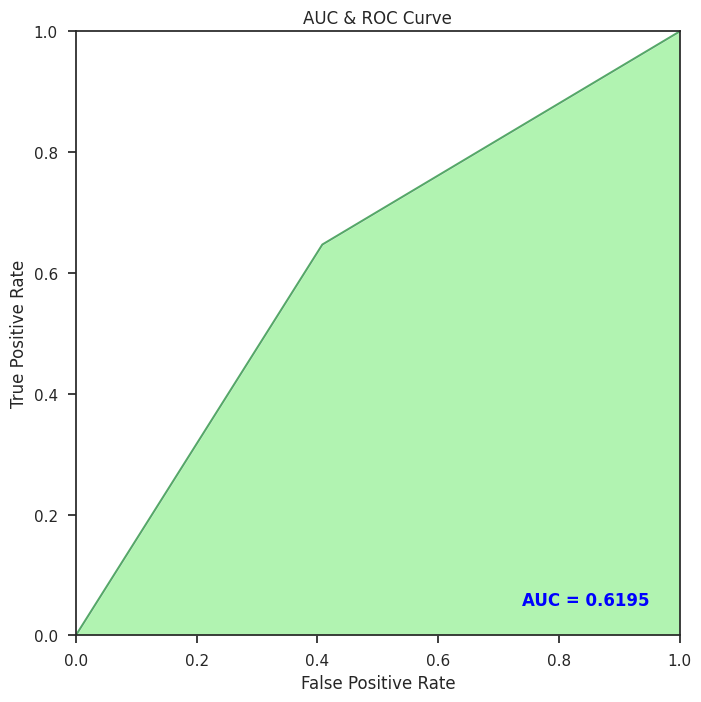

In [725]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### **DECISION TREE**

In [726]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [727]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9962 
Decision tree testing set accuracy: 0.7335 


In [728]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       272
           1       0.80      0.62      0.70       272

    accuracy                           0.73       544
   macro avg       0.75      0.73      0.73       544
weighted avg       0.75      0.73      0.73       544



In [729]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [730]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.6565 
Decision tree testing set accuracy: 0.5331 


In [731]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62       272
           1       0.56      0.32      0.41       272

    accuracy                           0.53       544
   macro avg       0.54      0.53      0.51       544
weighted avg       0.54      0.53      0.51       544



### **Random Forest Classifier**

In [732]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [733]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[262,  10],
       [ 88, 184]])

In [734]:
print(f"Random Forest training set accuracy: {format(classifier.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier.score(X_test, y_test), '.4f')} ")

Random Forest training set accuracy: 0.9930 
Random Forest testing set accuracy: 0.8199 


### **Support Vector Machine**

In [735]:
Classifier_svc= SVC(random_state=42,probability=True)
Classifier_svc.fit(X_train, y_train) 

SVC(probability=True, random_state=42)

In [736]:
#Predicting the test set result  
y_pred= Classifier_svc.predict(X_test)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[187,  85],
       [ 56, 216]])

In [737]:
print(f"SVC training set accuracy: {format(Classifier_svc.score(X_train, y_train), '.4f')} ")
print(f"SVC testing set accuracy: {format(Classifier_svc.score(X_test, y_test), '.4f')} ")

SVC training set accuracy: 0.8106 
SVC testing set accuracy: 0.7408 


### **Stochastic Gradient Descent classifier**

In [738]:
sgd= SGDClassifier(random_state=42,loss='perceptron')
sgd.fit(X_train, y_train) 

SGDClassifier(loss='perceptron', random_state=42)

In [739]:
#Predicting the test set result  
y_pred= sgd.predict(X_test)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[261,  11],
       [263,   9]])

In [740]:
print(f"SGD training set accuracy: {format(sgd.score(X_train, y_train), '.4f')} ")
print(f"SGD testing set accuracy: {format(sgd.score(X_test, y_test), '.4f')} ")

SGD training set accuracy: 0.5352 
SGD testing set accuracy: 0.4963 


### **Gaussian naive bayes**

In [741]:
gnb= GaussianNB()

In [742]:
gnb.fit(X_train, y_train) 

GaussianNB()

In [743]:
#Predicting the test set result  
y_pred= gnb.predict(X_test)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[139, 133],
       [ 20, 252]])

In [744]:
print(f"Gaussian naive bayes training set accuracy: {format(gnb.score(X_train, y_train), '.4f')} ")
print(f"Gaussian naive bayes testing set accuracy: {format(gnb.score(X_test, y_test), '.4f')} ")

Gaussian naive bayes training set accuracy: 0.6602 
Gaussian naive bayes testing set accuracy: 0.7188 


### **KNeighborsClassifier**

In [745]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [746]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [747]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[204  68]
 [109 163]]
0.6746323529411765


### **Cross Validation**

In [748]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []

In [749]:
for train_index , test_index in kf.split(X_test):
    x_train , x_test = X_test.iloc[train_index,:],X_test.iloc[test_index,:]
    y_train , Y_test = y_test[train_index] , y_test[test_index]
     
    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6055045871559633, 0.5504587155963303, 0.7431192660550459, 0.9908256880733946, 1.0]
Avg accuracy : 0.7779816513761468


In [750]:
# split the train data into X and y (target)
X_train, y_train = data_ml.loc[:, data_ml.columns != 'label'], data_ml['label'].astype('int64')

In [751]:
# split the train data into X and y (target)
X_test, y_test = data_ml_test.loc[:, data_ml_test.columns != 'label'], data_ml_test['label'].astype('int64')

### **GradientBoostingClassifier**

In [752]:
gradient_boosting= GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=42)

In [753]:
#Predicting the test set result  
y_pred= gradient_boosting.predict(X_test)  

In [754]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[249  23]
 [ 36 236]]
0.8915441176470589


### **Bagging**

In [755]:
bagging= BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train) 

BaggingClassifier(random_state=42)

In [756]:
#Predicting the test set result  
y_pred= bagging.predict(X_test) 

In [757]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[243  29]
 [100 172]]
0.7628676470588235


### **AdaBoost**

In [758]:
adaboost= AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train) 

AdaBoostClassifier(random_state=42)

In [759]:
#Predicting the test set result  
y_pred= adaboost.predict(X_test) 

In [760]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[225  47]
 [ 32 240]]
0.8547794117647058


# **We can that conclude that our top model is:**

# **Gradient boosting classifier**

## With an **accuracy score of 91%.**